In [21]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report

# define early stopping layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

In [22]:
train_dir ='Dataset/seg_train/seg_train'
test_dir ='Dataset/seg_test/seg_test'

In [23]:
batch_size =32
image_size = (150,150)
epoch=30

In [24]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  seed=123,
  image_size=image_size,
  batch_size=batch_size, )

test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.


In [25]:
from tensorflow.keras import layers

In [26]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150,150, 3), ))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3,3), activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Conv2D(256, (3,3), activation = 'relu')) 
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation = 'softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [27]:
filename='Models/Basemodel.hdf5'

es=EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
# Create learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=2, monitor='loss', verbose=1, min_lr = 0.000001)
chkpt=ModelCheckpoint(filename, verbose=1, save_best_only =True)

In [28]:
#train the network
hist1 =model.fit(train_ds, validation_data=test_ds, epochs=epoch,callbacks=[chkpt, es, lr_scheduler], verbose=1 )

Epoch 1/30
436/439 [============================>.] - ETA: 0s - loss: 2.4170 - accuracy: 0.5500
Epoch 1: val_loss improved from inf to 0.99264, saving model to Models\Basemodel.hdf5
439/439 [==============================] - 7s 16ms/step - loss: 2.4093 - accuracy: 0.5501 - val_loss: 0.9926 - val_accuracy: 0.6023 - lr: 0.0010
Epoch 2/30
438/439 [============================>.] - ETA: 0s - loss: 0.8691 - accuracy: 0.6693
Epoch 2: val_loss improved from 0.99264 to 0.86177, saving model to Models\Basemodel.hdf5
439/439 [==============================] - 7s 16ms/step - loss: 0.8689 - accuracy: 0.6694 - val_loss: 0.8618 - val_accuracy: 0.6887 - lr: 0.0010
Epoch 3/30
438/439 [============================>.] - ETA: 0s - loss: 0.7339 - accuracy: 0.7282
Epoch 3: val_loss improved from 0.86177 to 0.77258, saving model to Models\Basemodel.hdf5
439/439 [==============================] - 7s 16ms/step - loss: 0.7347 - accuracy: 0.7279 - val_loss: 0.7726 - val_accuracy: 0.7233 - lr: 0.0010
Epoch 4/30


In [29]:
df1=pd.DataFrame(hist1.history)
df1['epochs']=hist1.epoch
df1

,loss,accuracy,val_loss,val_accuracy,lr,epochs
0,2.409348,0.550093,0.992640,0.602333,0.001,0
1,0.868905,0.669446,0.861767,0.688667,0.001,1
2,0.734746,0.727875,0.772583,0.723333,0.001,2
3,0.671922,0.755594,0.816978,0.710000,0.001,3
4,0.583799,0.784880,0.790020,0.737000,0.001,4
5,0.569652,0.793787,0.672668,0.778000,0.001,5
6,0.501730,0.820864,0.764279,0.778000,0.001,6
7,0.465457,0.833761,0.705528,0.785333,0.001,7
8,0.414881,0.849936,0.734810,0.793667,0.001,8


Text(0, 0.5, 'loss')

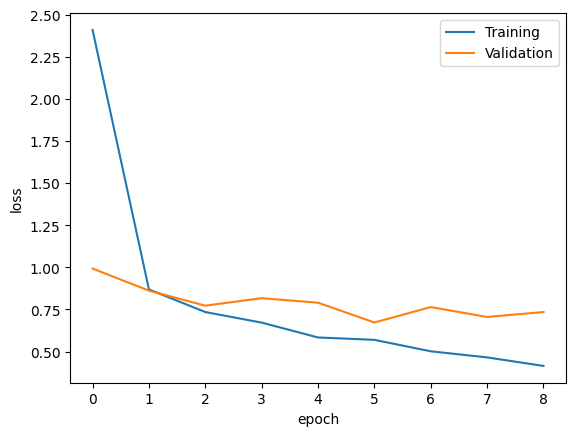

In [30]:
#visualize the model performance
import matplotlib.pyplot as plt
plt.plot(df1['loss'], label ='Training')
plt.plot(df1['val_loss'], label ='Validation')
plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

In [31]:
model.evaluate(test_ds)

94/94 [==============================] - 2s 15ms/step - loss: 0.7348 - accuracy: 0.7937


[0.7348102927207947, 0.793666660785675]

In [12]:
import numpy as np
predictions = model.predict(test_ds)

# Get the predicted class for each image
predicted_classes = np.argmax(predictions, axis=1)

print('Predicted classes:', predicted_classes)
print('True labels:', test_ds.classes)

94/94 [==============================] - 1s 10ms/step
Predicted classes: [1 5 0 ... 4 2 3]


AttributeError: 'BatchDataset' object has no attribute 'classes'

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy:\n', accuracy_score(test_generator.classes, predicted_classes))

NameError: name 'test_generator' is not defined

In [ ]:
print('Classification Report:\n', classification_report(test_generator.classes, predicted_classes))

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)